In [3]:
#import libray
#pre data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#read csv
df_streaming= pd.read_csv("free_video_streaming_services.csv")
len(df_streaming)

35

In [6]:
#data clean and adding useful columns
df_streaming.isnull().values.any()
df_streaming.isnull().sum()
df_streaming.info()
df_streaming.duplicated().any()

df_streaming["month price avg"]=df_streaming["monthly_price_usd"].mean()
#df_streaming.columns
#end of pre data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   service_name               35 non-null     object 
 1   type                       35 non-null     object 
 2   category                   35 non-null     object 
 3   countries_available        35 non-null     object 
 4   monthly_price_usd          35 non-null     float64
 5   annual_price_usd           35 non-null     float64
 6   launch_year                35 non-null     int64  
 7   subscribers_millions       35 non-null     float64
 8   content_type               35 non-null     object 
 9   platforms                  35 non-null     object 
 10  is_free                    35 non-null     bool   
 11  parent_company             35 non-null     object 
 12  age_group_18_24_pct        35 non-null     float64
 13  age_group_25_34_pct        35 non-null     float64
 

(np.float64(-1.0999986797825598),
 np.float64(1.0999998373043411),
 np.float64(-1.0999944826836092),
 np.float64(1.0999997540908262))

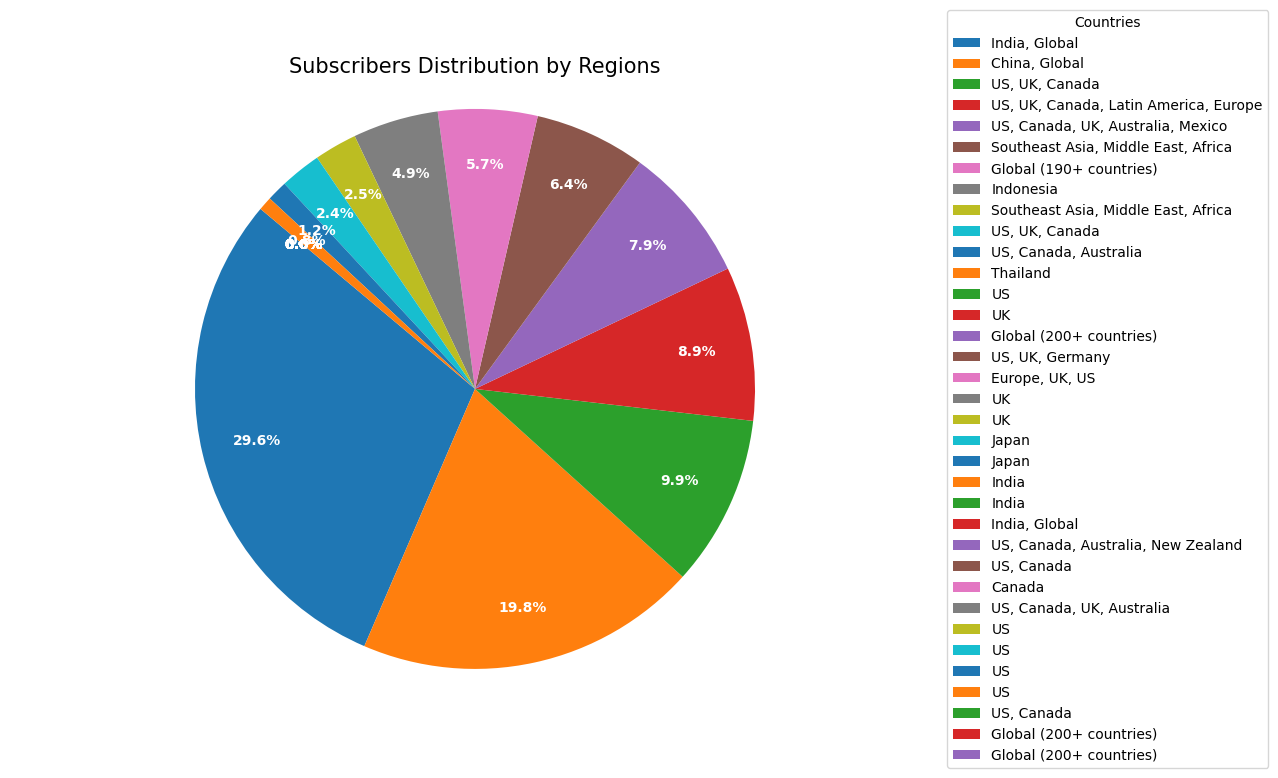

In [ ]:
#where we have subs per region for example in india there is most of the subs
labels = df_streaming['countries_available']
sizes = df_streaming['subscribers_millions']

fig, ax = plt.subplots(figsize=(12, 8))

wedges, texts, autotexts = ax.pie(
    sizes, 
    autopct='%1.1f%%', 
    pctdistance=0.8, 
    startangle=140,
    textprops={'color':"w", 'weight':'bold'}
)

ax.legend(
    wedges, 
    labels, 
    title="Countries", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

ax.set_title("Subscribers Distribution by Regions", fontsize=15)
ax.axis('equal')

In [65]:
sorted(df_streaming["countries_available"].unique())[:30]


['Canada',
 'China, Global',
 'Europe, UK, US',
 'Global (190+ countries)',
 'Global (200+ countries)',
 'India',
 'India, Global',
 'Indonesia',
 'Japan',
 'Southeast Asia, Middle East, Africa',
 'Thailand',
 'UK',
 'US',
 'US, Canada',
 'US, Canada, Australia',
 'US, Canada, Australia, New Zealand',
 'US, Canada, UK, Australia',
 'US, Canada, UK, Australia, Mexico',
 'US, UK, Canada',
 'US, UK, Canada, Latin America, Europe',
 'US, UK, Germany']

In [8]:
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "browser"

df_map = df_streaming.copy()
df_map['countries_available'] = df_map['countries_available'].str.split(', ')
df_map = df_map.explode('countries_available')

fig = px.choropleth(
    df_map,
    locations="countries_available",
    locationmode='country names',
    color="subscribers_millions",
    hover_name="service_name",
    title="Global Reach vs Subscribers",
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


C:\Users\yarin\AppData\Local\Temp\ipykernel_11152\3062336062.py:10: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



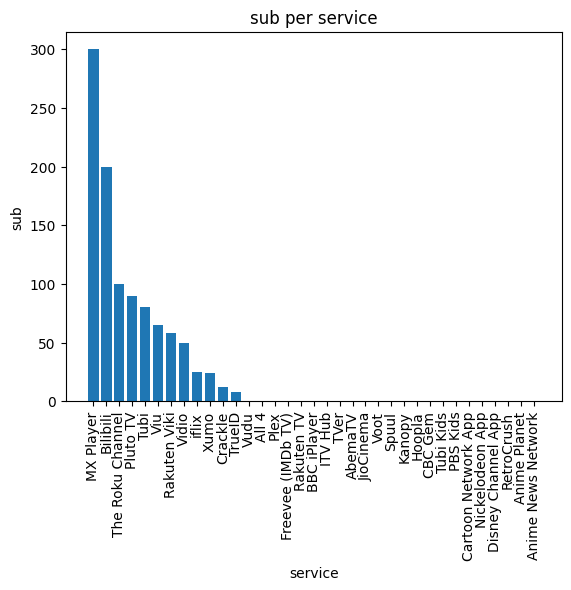

In [ ]:
#stage 4
#as we can see the highst number of subs is mx plar with 300 milion sub
plt.bar(df_streaming["service_name"],df_streaming["subscribers_millions"])
plt.title("sub per service")
plt.xlabel("service")
plt.ylabel("sub")
plt.xticks(rotation=90)
plt.show()

 correlation between price per month and subs: 0.05


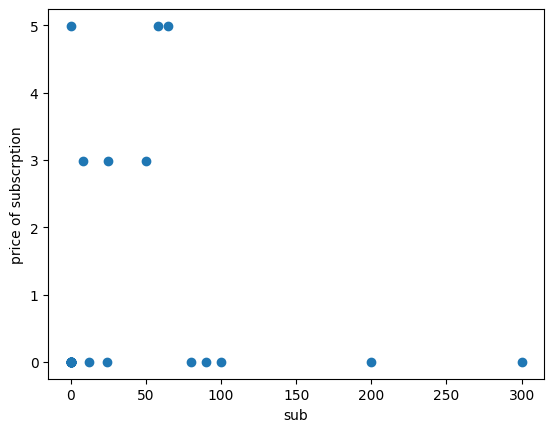

In [ ]:



cor=df_streaming["subscribers_millions"].corr(df_streaming["monthly_price_usd"])
print(f" correlation between price per month and subs: {cor:.2f}")
plt.scatter(df_streaming["subscribers_millions"],df_streaming["monthly_price_usd"])
plt.xlabel("sub")
plt.ylabel("price of subscrption")
plt.title("")
plt.show()





Correlation between monthly and annual price: 1.00


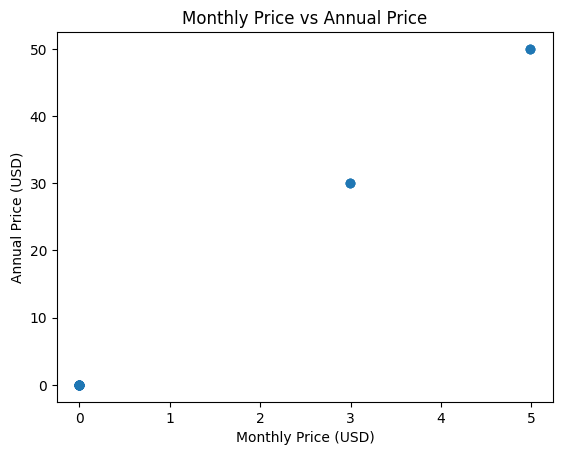

In [39]:
corr = df_streaming["monthly_price_usd"].corr(
    df_streaming["annual_price_usd"])

print(f"Correlation between monthly and annual price: {corr:.2f}")

plt.scatter(
    df_streaming["monthly_price_usd"],
    df_streaming["annual_price_usd"])

plt.xlabel("Monthly Price (USD)")
plt.ylabel("Annual Price (USD)")
plt.title("Monthly Price vs Annual Price")

plt.show()

Correlation between monthly price and launch year: 0.19


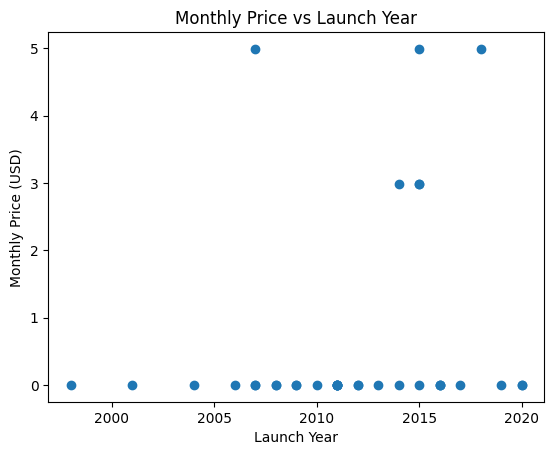

In [44]:
import matplotlib.pyplot as plt


corr = df_streaming["monthly_price_usd"].corr(
    df_streaming["launch_year"])

print(f"Correlation between monthly price and launch year: {corr:.2f}")


plt.scatter(
    df_streaming["launch_year"],
    df_streaming["monthly_price_usd"])

plt.xlabel("Launch Year")
plt.ylabel("Monthly Price (USD)")
plt.title("Monthly Price vs Launch Year")

plt.show()


The exact correlation is: -0.76


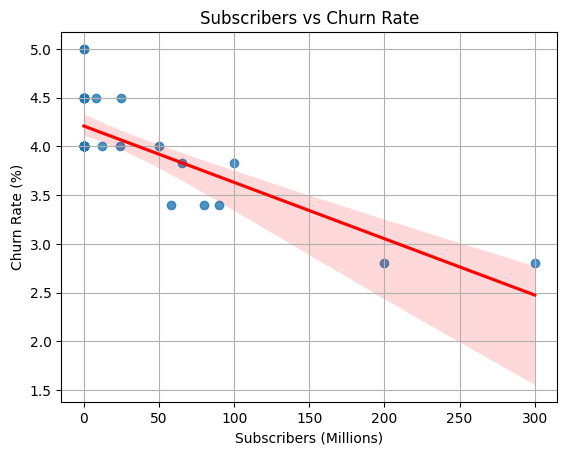

In [70]:
sns.regplot(data=df_streaming, x='subscribers_millions', y='churn_rate_pct',
             line_kws={'color':'red'})

plt.title('Subscribers vs Churn Rate')
plt.xlabel('Subscribers (Millions)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)

correlation_value = df_streaming['subscribers_millions'].corr(df_streaming['churn_rate_pct'])
print(f"The exact correlation is: {correlation_value:.2f}")
